# Nike Stock Analysis

This notebook analyzes Nike's historical stock market data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## Load Data


In [2]:
df_nike = pd.read_csv('datasets/nike stock/Nike_historical_data.csv')

print(f"Dataset shape: {df_nike.shape}")
display(df_nike.head(10))
df_nike.info()
print("\nStatistical Summary:")
display(df_nike.describe())


Dataset shape: (11327, 8)


,Date,Open,High,Low,Close,Volume,ticker,name
0,1980-12-02 00:00:00-05:00,0.124361,0.127064,0.124361,0.124361,100710400,NKE,"Nike, Inc. (NKE) Historical Data"
1,1980-12-03 00:00:00-05:00,0.123008,0.123008,0.121657,0.121657,25177600,NKE,"Nike, Inc. (NKE) Historical Data"
2,1980-12-04 00:00:00-05:00,0.125712,0.127064,0.125712,0.125712,22694400,NKE,"Nike, Inc. (NKE) Historical Data"
3,1980-12-05 00:00:00-05:00,0.121657,0.121657,0.118953,0.118953,7590400,NKE,"Nike, Inc. (NKE) Historical Data"
4,1980-12-08 00:00:00-05:00,0.113547,0.113547,0.112195,0.112195,5414400,NKE,"Nike, Inc. (NKE) Historical Data"
5,1980-12-09 00:00:00-05:00,0.112194,0.112194,0.109491,0.109491,5824000,NKE,"Nike, Inc. (NKE) Historical Data"
6,1980-12-10 00:00:00-05:00,0.106788,0.106788,0.102733,0.102733,5875200,NKE,"Nike, Inc. (NKE) Historical Data"
7,1980-12-11 00:00:00-05:00,0.100029,0.100029,0.097326,0.097326,5440000,NKE,"Nike, Inc. (NKE) Historical Data"
8,1980-12-12 00:00:00-05:00,0.101381,0.102733,0.101381,0.101381,8153600,NKE,"Nike, Inc. (NKE) Historical Data"
9,1980-12-15 00:00:00-05:00,0.105436,0.106788,0.105436,0.105436,6643200,NKE,"Nike, Inc. (NKE) Historical Data"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11327 entries, 0 to 11326
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11327 non-null  object 
 1   Open    11327 non-null  float64
 2   High    11327 non-null  float64
 3   Low     11327 non-null  float64
 4   Close   11327 non-null  float64
 5   Volume  11327 non-null  int64  
 6   ticker  11327 non-null  object 
 7   name    11327 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 708.1+ KB

Statistical Summary:


,Open,High,Low,Close,Volume
count,11327.000000,11327.000000,11327.000000,11327.000000,1.132700e+04
mean,24.922931,25.182586,24.662148,24.923093,1.173981e+07
std,36.627782,36.997947,36.244616,36.616994,1.044316e+07
min,0.074346,0.075698,0.071643,0.074346,0.000000e+00
25%,1.173375,1.185572,1.157954,1.174118,6.212800e+06
50%,5.746677,5.789678,5.669471,5.732129,9.040000e+06
75%,34.315629,34.477247,34.120337,34.300575,1.367135e+07
max,166.214857,168.806782,165.413675,167.308151,1.574456e+08


## Data Preprocessing


In [3]:
date_col = next((col for col in df_nike.columns if 'date' in col.lower()), None)
if date_col:
    df_nike[date_col] = pd.to_datetime(df_nike[date_col])
    df_nike = df_nike.sort_values(date_col)
    print(f"Date range: {df_nike[date_col].min()} to {df_nike[date_col].max()}")


Date range: 1980-12-02 00:00:00-05:00 to 2025-11-07 00:00:00-05:00


C:\Users\paulm\AppData\Local\Temp\ipykernel_12076\1481408907.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_nike[date_col] = pd.to_datetime(df_nike[date_col])


## Stock Price Visualization


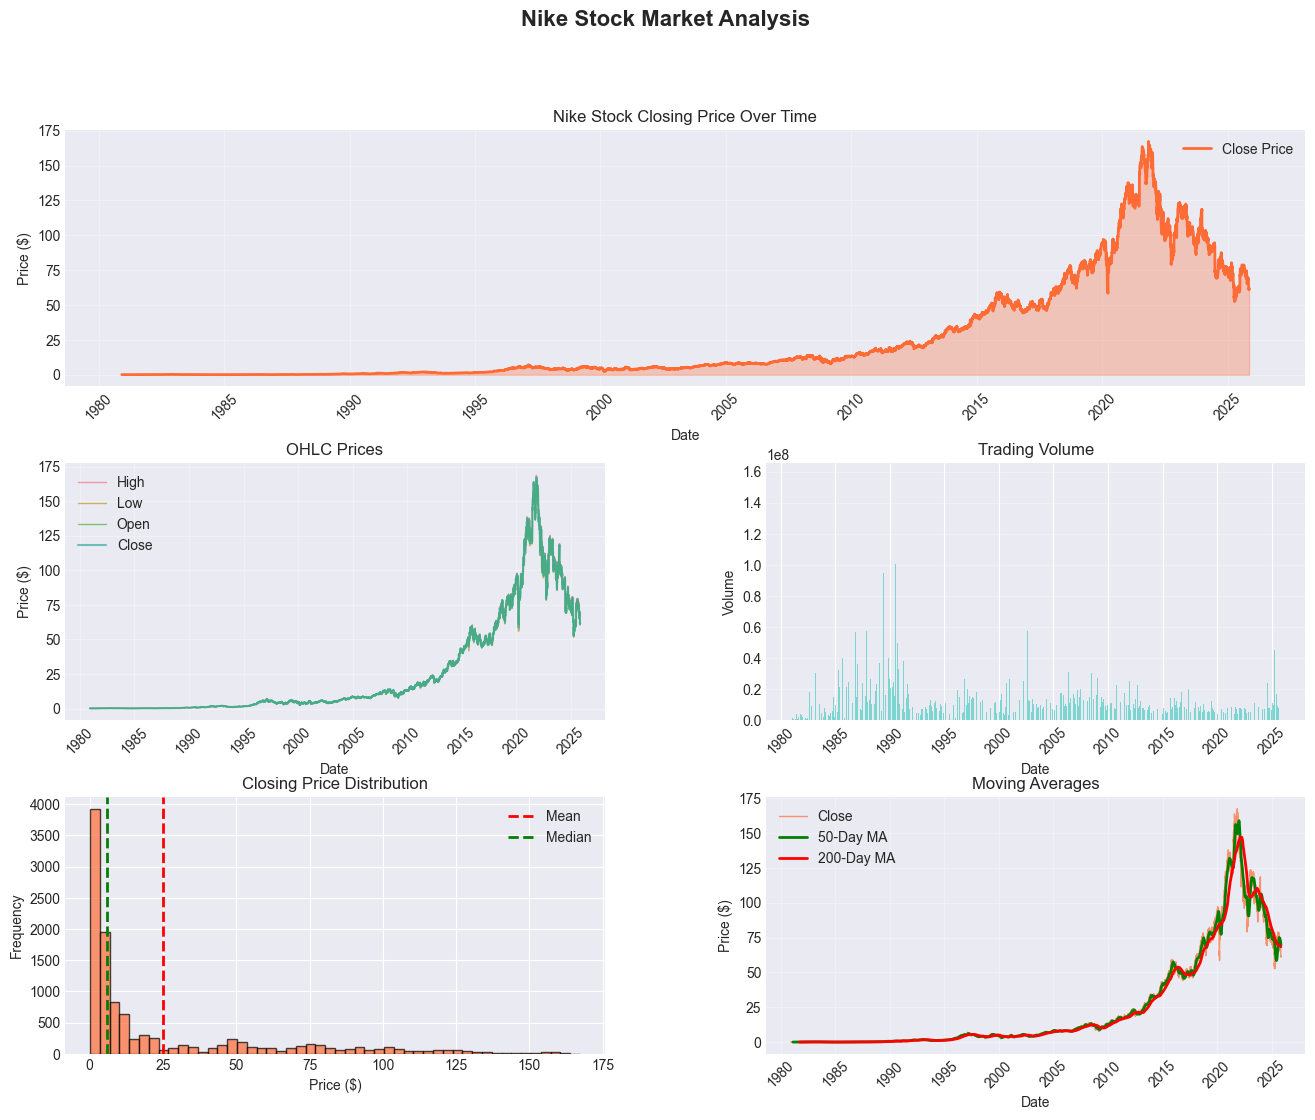

In [4]:
close_col = next((col for col in df_nike.columns if 'close' in col.lower()), None)
open_col = next((col for col in df_nike.columns if 'open' in col.lower()), None)
high_col = next((col for col in df_nike.columns if 'high' in col.lower()), None)
low_col = next((col for col in df_nike.columns if 'low' in col.lower()), None)
volume_col = next((col for col in df_nike.columns if 'volume' in col.lower()), None)

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Nike Stock Market Analysis', fontsize=16, fontweight='bold')

if date_col and close_col:
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(df_nike[date_col], df_nike[close_col], linewidth=2, color='#FF6B35', label='Close Price')
    ax1.set_title('Nike Stock Closing Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.fill_between(df_nike[date_col], df_nike[close_col], alpha=0.3, color='#FF6B35')

if date_col and all([open_col, high_col, low_col, close_col]):
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(df_nike[date_col], df_nike[high_col], label='High', alpha=0.7, linewidth=1)
    ax2.plot(df_nike[date_col], df_nike[low_col], label='Low', alpha=0.7, linewidth=1)
    ax2.plot(df_nike[date_col], df_nike[open_col], label='Open', alpha=0.7, linewidth=1)
    ax2.plot(df_nike[date_col], df_nike[close_col], label='Close', alpha=0.7, linewidth=1.5)
    ax2.set_title('OHLC Prices')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price ($)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

if date_col and volume_col:
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.bar(df_nike[date_col], df_nike[volume_col], color='#4ECDC4', alpha=0.7)
    ax3.set_title('Trading Volume')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Volume')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3, axis='y')

if close_col:
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.hist(df_nike[close_col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='#FF6B35')
    ax4.axvline(df_nike[close_col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax4.axvline(df_nike[close_col].median(), color='green', linestyle='--', linewidth=2, label='Median')
    ax4.set_title('Closing Price Distribution')
    ax4.set_xlabel('Price ($)')
    ax4.set_ylabel('Frequency')
    ax4.legend()

if date_col and close_col:
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(df_nike[date_col], df_nike[close_col], linewidth=1, alpha=0.7, label='Close', color='#FF6B35')
    if len(df_nike) >= 50:
        df_nike['MA_50'] = df_nike[close_col].rolling(window=50).mean()
        ax5.plot(df_nike[date_col], df_nike['MA_50'], linewidth=2, label='50-Day MA', color='green')
    if len(df_nike) >= 200:
        df_nike['MA_200'] = df_nike[close_col].rolling(window=200).mean()
        ax5.plot(df_nike[date_col], df_nike['MA_200'], linewidth=2, label='200-Day MA', color='red')
    ax5.set_title('Moving Averages')
    ax5.set_xlabel('Date')
    ax5.set_ylabel('Price ($)')
    ax5.tick_params(axis='x', rotation=45)
    ax5.legend()
    ax5.grid(True, alpha=0.3)

plt.show()


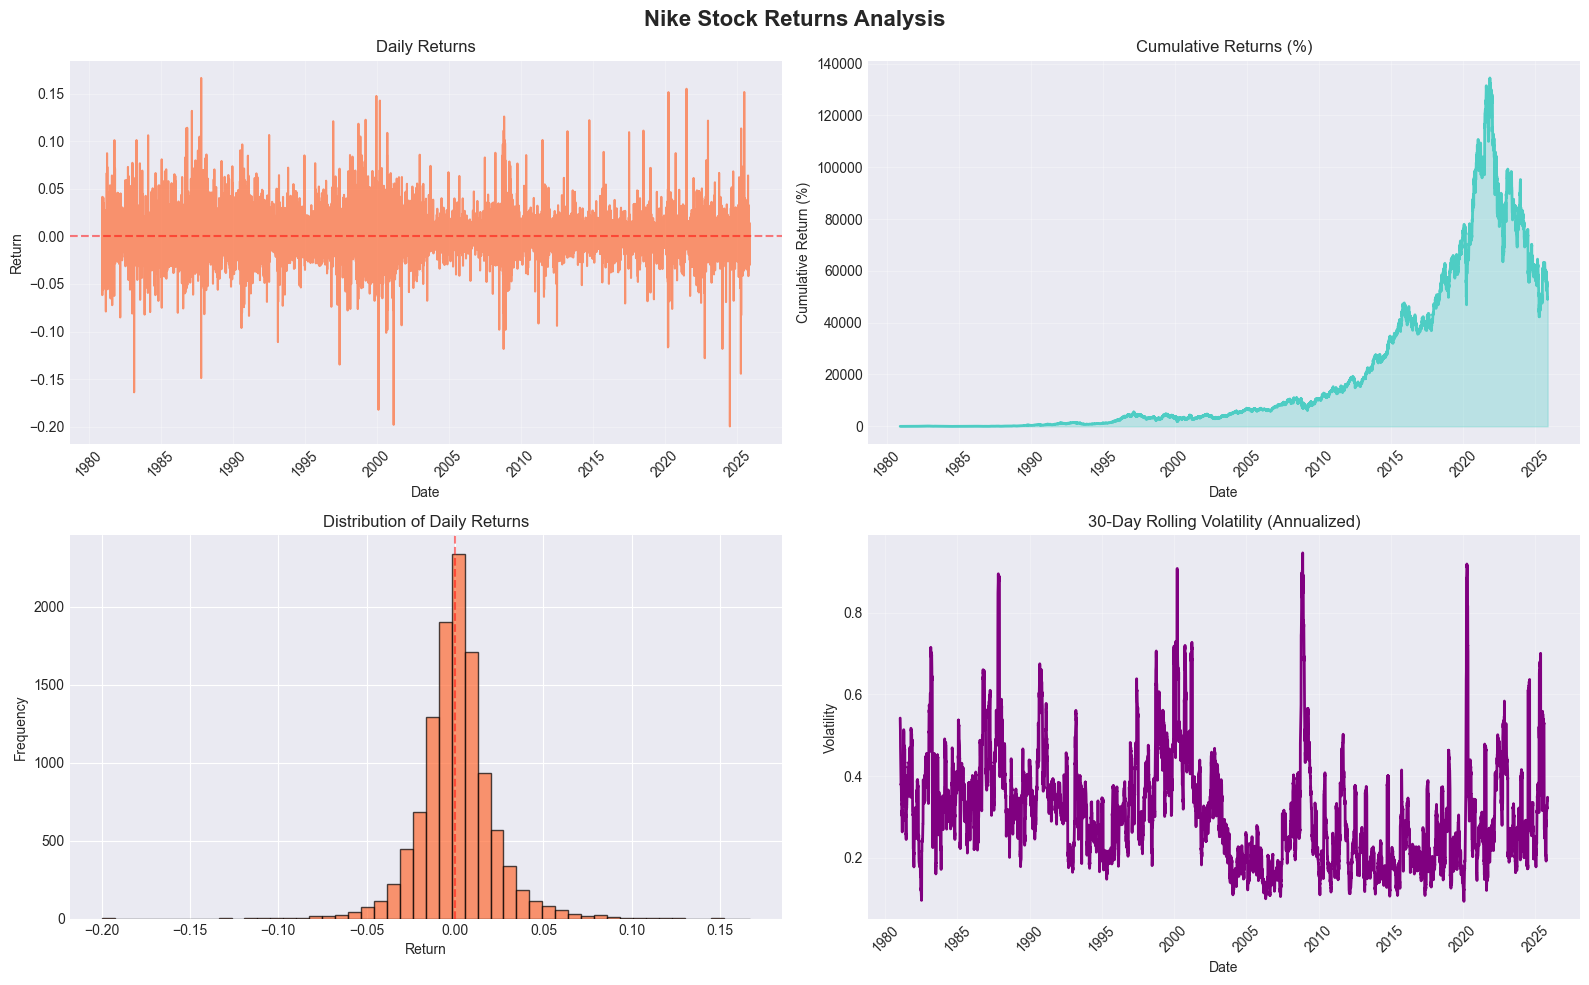

In [5]:
if close_col:
    df_nike['daily_return'] = df_nike[close_col].pct_change()
    df_nike['cumulative_return'] = (1 + df_nike['daily_return']).cumprod() - 1
    df_nike['rolling_volatility'] = df_nike['daily_return'].rolling(window=30).std() * np.sqrt(252)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Nike Stock Returns Analysis', fontsize=16, fontweight='bold')
    
    axes[0, 0].plot(df_nike[date_col], df_nike['daily_return'], alpha=0.7, color='#FF6B35')
    axes[0, 0].set_title('Daily Returns')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Return')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(df_nike[date_col], df_nike['cumulative_return'] * 100, linewidth=2, color='#4ECDC4')
    axes[0, 1].set_title('Cumulative Returns (%)')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Cumulative Return (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].fill_between(df_nike[date_col], df_nike['cumulative_return'] * 100, alpha=0.3, color='#4ECDC4')
    
    axes[1, 0].hist(df_nike['daily_return'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='#FF6B35')
    axes[1, 0].set_title('Distribution of Daily Returns')
    axes[1, 0].set_xlabel('Return')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(x=0, color='r', linestyle='--', alpha=0.5)
    
    axes[1, 1].plot(df_nike[date_col], df_nike['rolling_volatility'], linewidth=2, color='purple')
    axes[1, 1].set_title('30-Day Rolling Volatility (Annualized)')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Volatility')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [6]:
if close_col:
    print("=== Nike Stock Summary ===")
    print(f"Total Trading Days: {len(df_nike)}")
    print(f"\nPrice Statistics:")
    print(f"  Current Price: ${df_nike[close_col].iloc[-1]:.2f}")
    print(f"  Average Price: ${df_nike[close_col].mean():.2f}")
    print(f"  Minimum Price: ${df_nike[close_col].min():.2f}")
    print(f"  Maximum Price: ${df_nike[close_col].max():.2f}")
    print(f"  Standard Deviation: ${df_nike[close_col].std():.2f}")
    
    if volume_col:
        print(f"\nVolume Statistics:")
        print(f"  Average Daily Volume: {df_nike[volume_col].mean():,.0f}")
    
    if 'daily_return' in df_nike.columns:
        print(f"\nReturn Statistics:")
        print(f"  Average Daily Return: {df_nike['daily_return'].mean():.4f} ({df_nike['daily_return'].mean()*100:.2f}%)")
        print(f"  Total Return: {df_nike['cumulative_return'].iloc[-1]*100:.2f}%")
        print(f"  Best Day: {df_nike['daily_return'].max()*100:.2f}%")
        print(f"  Worst Day: {df_nike['daily_return'].min()*100:.2f}%")


=== Nike Stock Summary ===
Total Trading Days: 11327

Price Statistics:
  Current Price: $61.09
  Average Price: $24.92
  Minimum Price: $0.07
  Maximum Price: $167.31
  Standard Deviation: $36.62

Volume Statistics:
  Average Daily Volume: 11,739,810

Return Statistics:
  Average Daily Return: 0.0008 (0.08%)
  Total Return: 49023.18%
  Best Day: 16.67%
  Worst Day: -19.98%
